<a href="https://colab.research.google.com/github/shivanidhar29/CloudIoTRaspberry/blob/main/DuPontAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import requests
import pandas as pd
myAPIkey ='5e44a5083ea7ed6ecada7c23e9f37dbe'
stock = 'AAPL'

balanceStatements = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIkey}"
).json()
incomeStatements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIkey}'
).json()
print(balanceStatements[:5])


[{'date': '2021-09-25', 'symbol': 'AAPL', 'reportedCurrency': 'USD', 'cik': '0000320193', 'fillingDate': '2021-10-29', 'acceptedDate': '2021-10-28 18:04:28', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 34940000000, 'shortTermInvestments': 27699000000, 'cashAndShortTermInvestments': 62639000000, 'netReceivables': 51506000000, 'inventory': 6580000000, 'otherCurrentAssets': 14111000000, 'totalCurrentAssets': 134836000000, 'propertyPlantEquipmentNet': 39440000000, 'goodwill': 0.0, 'intangibleAssets': 0.0, 'goodwillAndIntangibleAssets': 0.0, 'longTermInvestments': 127877000000, 'taxAssets': 0.0, 'otherNonCurrentAssets': 48849000000, 'totalNonCurrentAssets': 216166000000, 'otherAssets': 0.0, 'totalAssets': 351002000000, 'accountPayables': 54763000000, 'shortTermDebt': 15613000000, 'taxPayables': 0.0, 'deferredRevenue': 7612000000, 'otherCurrentLiabilities': 47493000000, 'totalCurrentLiabilities': 125481000000, 'longTermDebt': 109106000000, 'deferredRevenueNonCurrent': 0

In [113]:
FiveYearBalanceStatement=balanceStatements[:5]
FiveYearIncomeStatement=incomeStatements[:5]


In [114]:
profitability=[]
assetTurnOver=[]
capitalStructure=[]
returnOnEquitly=[]
dates=[]

for i in range(0,5):
  dates.append(FiveYearBalanceStatement[i]['date'])
  profitabilityValue=FiveYearIncomeStatement[i]['netIncome']/FiveYearIncomeStatement[i]['revenue']
  profitability.append(profitabilityValue)
  
  assetTurnOverValue=FiveYearIncomeStatement[i]['revenue']/FiveYearBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue)
  
  capitalStructureValue= FiveYearBalanceStatement[i]['totalAssets']/FiveYearBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)

  returnOnEquitlyValue=profitabilityValue*assetTurnOverValue*capitalStructureValue
  returnOnEquitly.append(returnOnEquitlyValue)


In [115]:
print(returnOnEquitly)

[1.5007132667617686, 0.878663585301275, 0.6106445053487755, 0.5556011834209078, 0.36070184338329087]


In [116]:
df=pd.DataFrame(columns=['date','profitability','assetTurnOver','capitalStructure','returnOnEquitly'])
df['date']=dates
df['profitability']=profitability
df['assetTurnOver']=assetTurnOver
df['capitalStructure']=capitalStructure
df['returnOnEquitly']=returnOnEquitly

print(df)

         date  profitability  assetTurnOver  capitalStructure  returnOnEquitly
0  2021-09-25       0.258818       1.042208          5.563512         1.500713
1  2020-09-26       0.209136       0.847562          4.957039         0.878664
2  2019-09-28       0.212381       0.768572          3.741004         0.610645
3  2018-09-29       0.224142       0.726215          3.413301         0.555601
4  2017-09-30       0.210924       0.610771          2.799906         0.360702


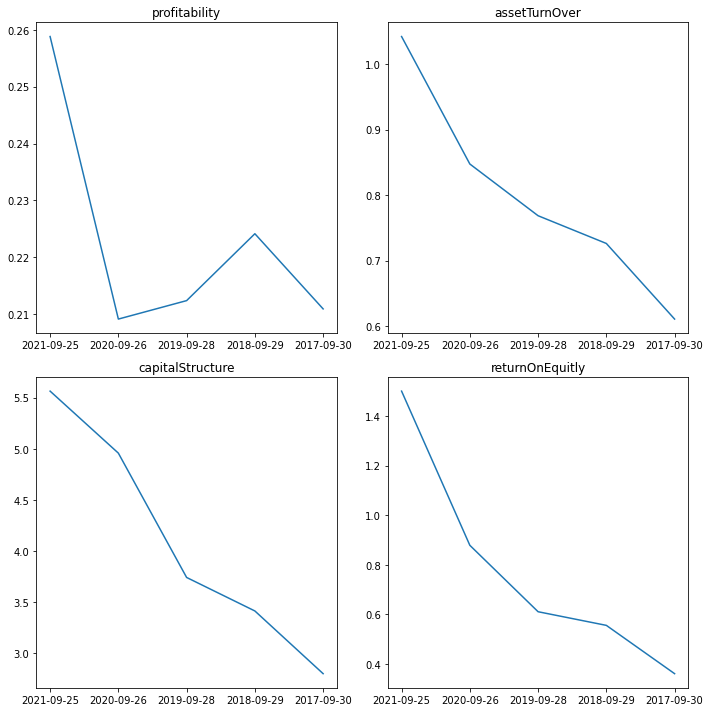

In [122]:
import matplotlib.pyplot as plt
fig, axs= plt.subplots(2,2, figsize=(10,10))

x=df['date']
Values=['profitability','assetTurnOver', 'capitalStructure', 'returnOnEquitly']
for i in range(0,2):
    for j in range(0,2):
      valueIndex=i*2+j
      axs[i,j].plot (x,df[Values[valueIndex]])
      axs[i,j].set_title(Values[valueIndex])

fig.tight_layout()
